## SPAM EMAIL CLASSIFICATION

#### This machine learning project focuses on building a spam email classifier using a dataset containing 48 word-frequency features, 6 special character frequency features, and 3 capital letter usage features (including longest and total capital runs), with a binary label indicating spam (1) or non-spam (0) emails


Import libraries

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score


Import dataset and clean the data

In [2]:
data  = pd.read_csv(r"D:\Datascience\My_Projects\Spam_mail_classification\spambase_csv.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [4]:
data.isnull().any()

word_freq_make                False
word_freq_address             False
word_freq_all                 False
word_freq_3d                  False
word_freq_our                 False
word_freq_over                False
word_freq_remove              False
word_freq_internet            False
word_freq_order               False
word_freq_mail                False
word_freq_receive             False
word_freq_will                False
word_freq_people              False
word_freq_report              False
word_freq_addresses           False
word_freq_free                False
word_freq_business            False
word_freq_email               False
word_freq_you                 False
word_freq_credit              False
word_freq_your                False
word_freq_font                False
word_freq_000                 False
word_freq_money               False
word_freq_hp                  False
word_freq_hpl                 False
word_freq_george              False
word_freq_650               

In [5]:
data.duplicated().any()

True

In [6]:
data = data.drop_duplicates()

In [7]:
data.duplicated().any()

False

In [8]:
data = data.round(2)

Correlation

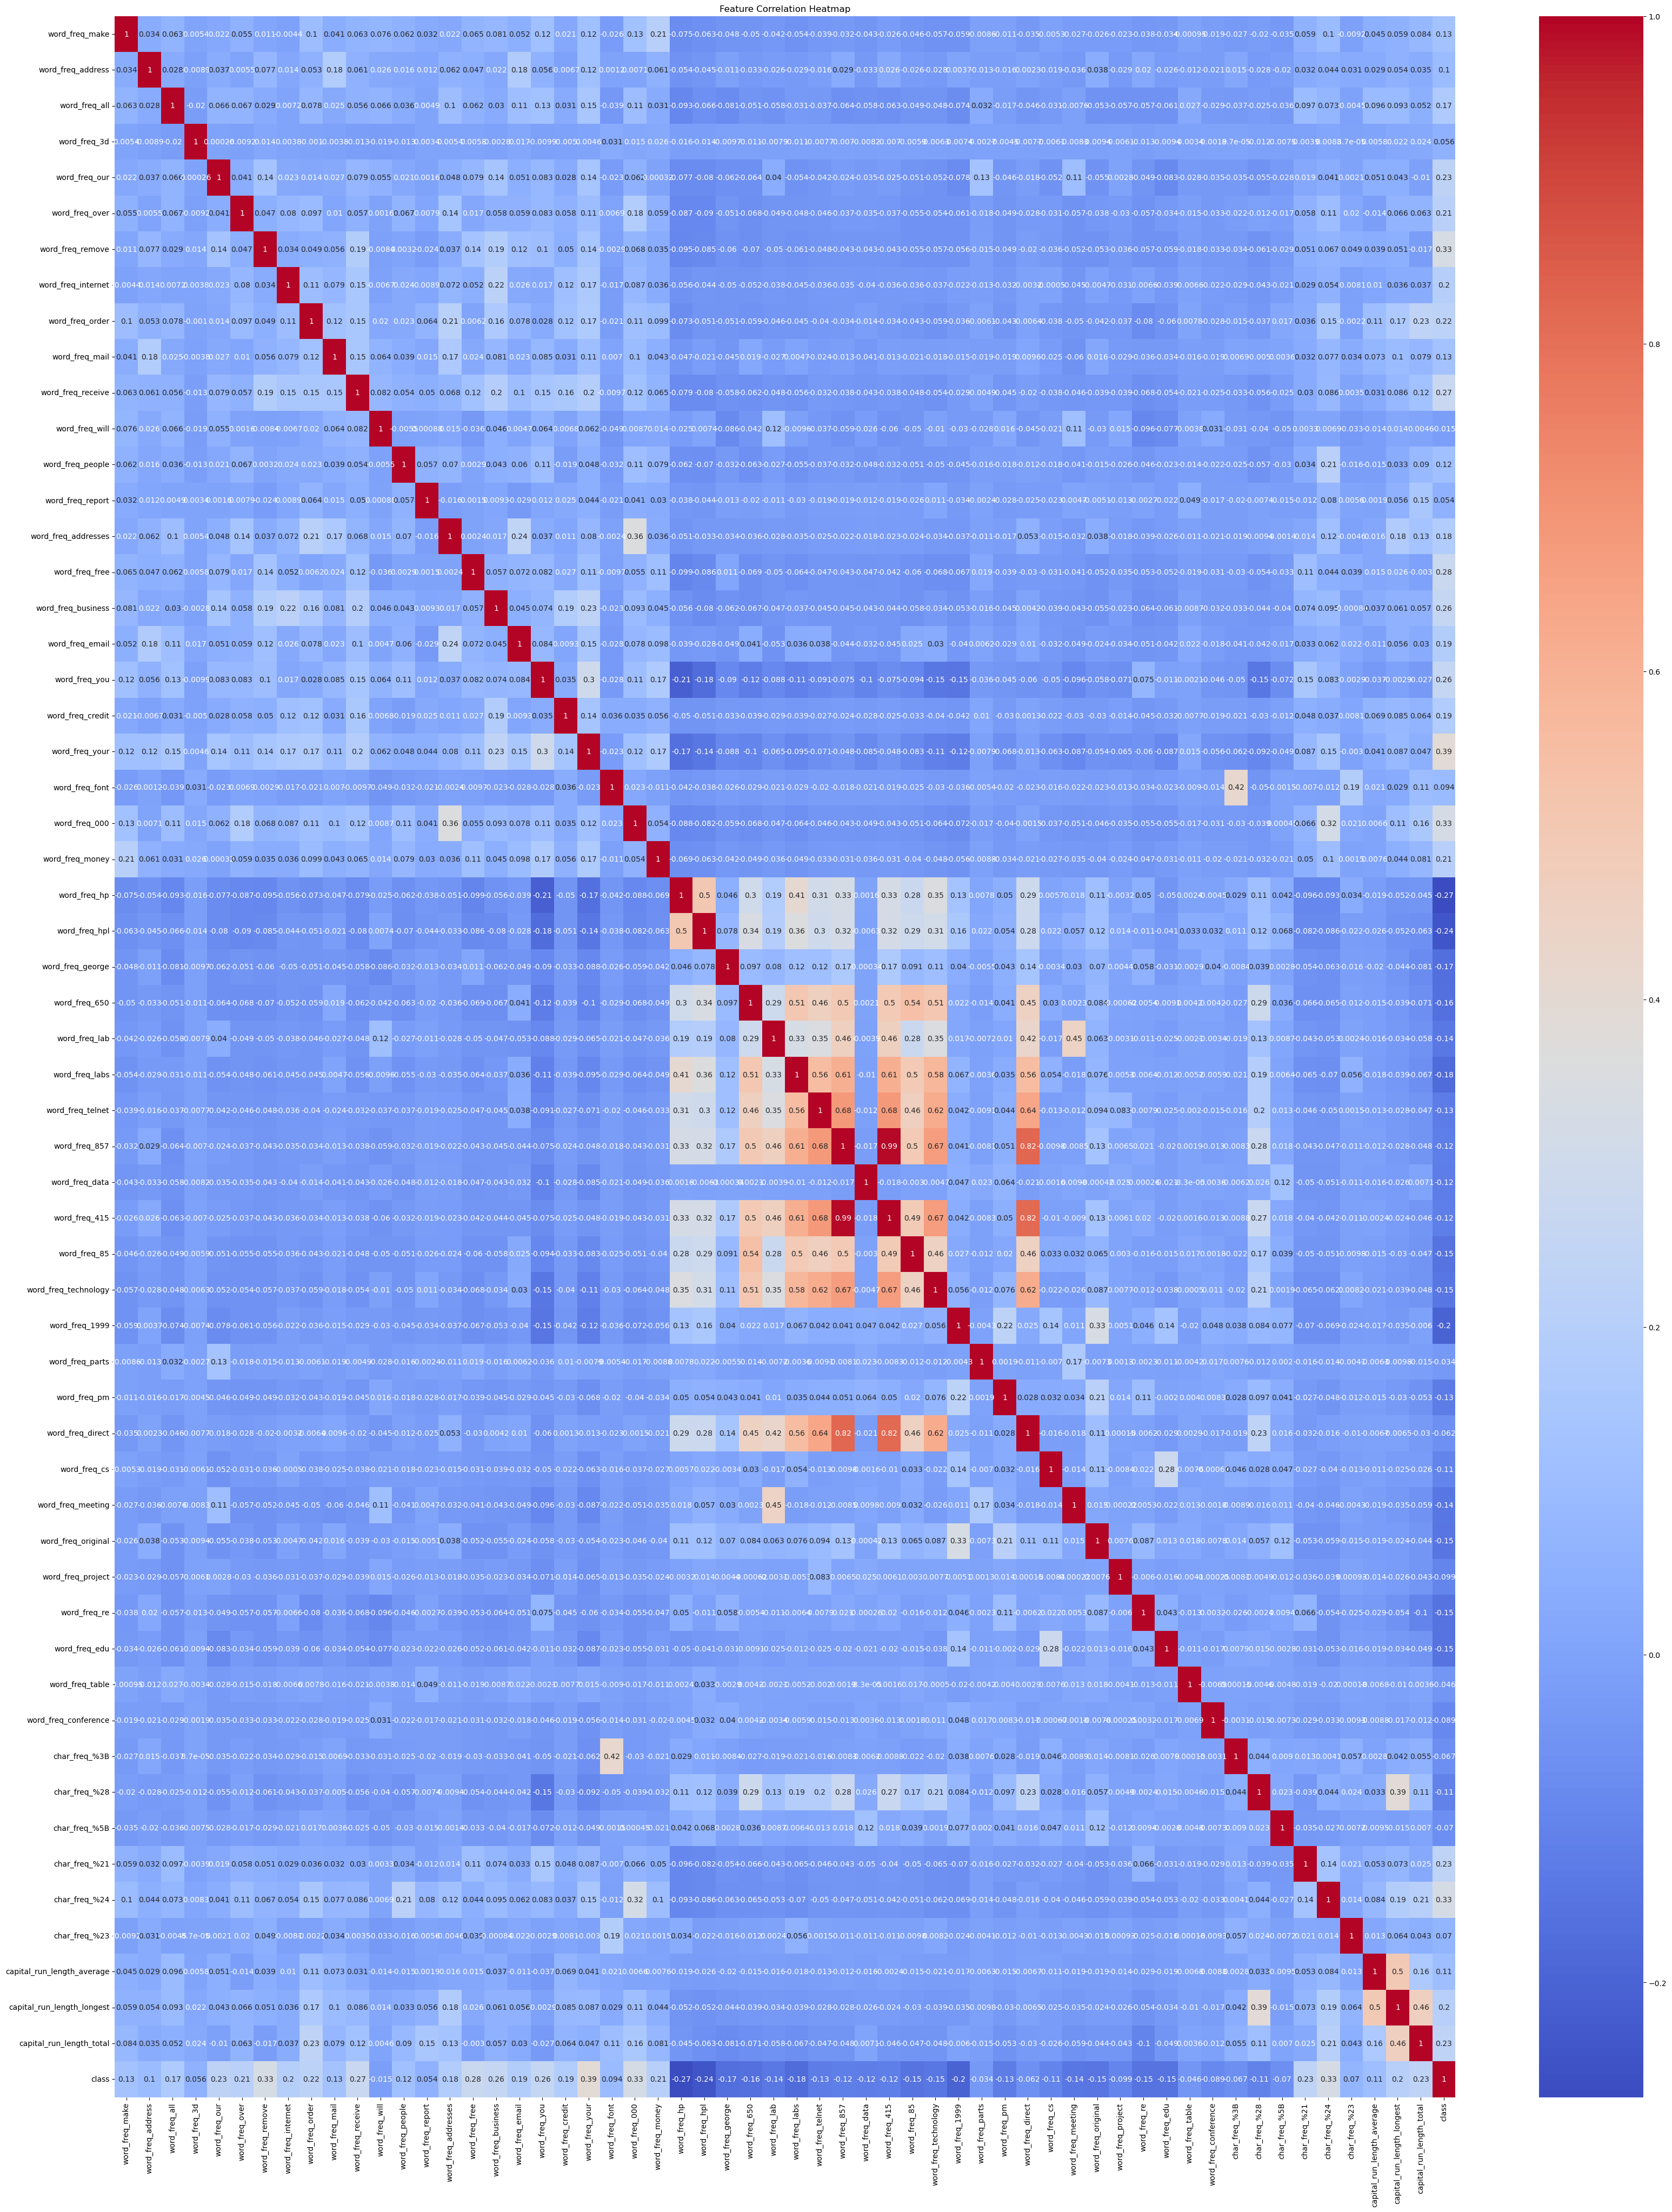

In [9]:
plt.figure(figsize=(40, 50))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

Applying winsorization method

In [10]:
import numpy as np
import pandas as pd
from scipy.stats.mstats import winsorize

lower_limit = 0.05  
upper_limit = 0.95   

df_winsorized = data.apply(
    lambda x: winsorize(x, limits=(lower_limit, upper_limit)),
    axis=0
)
df_winsorized = pd.DataFrame(df_winsorized, columns=data.columns)

print("Original Data Shape:", data.shape)
print("Winsorized Data Shape:", df_winsorized.shape) 

Original Data Shape: (4210, 58)
Winsorized Data Shape: (4210, 58)


Splitting dataset to test and train data

In [11]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

LOGISTIC REGRESSION

In [14]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver = "lbfgs",max_iter = 1000)


In [15]:
model.fit(x_train,y_train)
y_pred1 = model.predict(x_test)
y_pred_train = model.predict(x_train)

In [16]:
print("Train Accuracy:%2f"%(accuracy_score(y_train,y_pred_train)*100))
print("Test Accuracy:%2f"% (accuracy_score(y_test,y_pred1)*100))

Train Accuracy:92.458432
Test Accuracy:90.617577


In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
train_precision1 = precision_score(y_train, y_pred_train, average='weighted')
train_recall1 = recall_score(y_train, y_pred_train, average='weighted')
print("Train Precision: %.2f%%" % (train_precision1 * 100))
print("Train Recall: %.2f%%" % (train_recall1 * 100))

test_precision1 = precision_score(y_test, y_pred1, average='weighted')
test_recall1 = recall_score(y_test, y_pred1, average='weighted') 
print("Test Precision: %.2f%%" % (test_precision1 * 100))
print("Test Recall: %.2f%%" % (test_recall1 * 100))

Train Precision: 92.46%
Train Recall: 92.46%
Test Precision: 90.77%
Test Recall: 90.62%


KNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=5,metric = "minkowski", p =2)
model2.fit(x_train,y_train)

KNeighborsClassifier()

In [19]:
y_pred2 = model2.predict(x_test)
y_pred_train2 = model2.predict(x_train)

In [20]:
print("Train Accuracy:%2f"%(accuracy_score(y_train,y_pred_train2)*100))
print("Test Accuracy:%2f"% (accuracy_score(y_test,y_pred2)*100))

Train Accuracy:93.200713
Test Accuracy:89.073634


In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
train_precision2 = precision_score(y_train, y_pred_train2, average='weighted')
train_recall2 = recall_score(y_train, y_pred_train2, average='weighted')
print("Train Precision: %.2f%%" % (train_precision2 * 100))
print("Train Recall: %.2f%%" % (train_recall2 * 100))

test_precision2 = precision_score(y_test, y_pred2, average='weighted')
test_recall2 = recall_score(y_test, y_pred2, average='weighted') 
print("Test Precision: %.2f%%" % (test_precision2 * 100))
print("Test Recall: %.2f%%" % (test_recall2 * 100))

Train Precision: 93.20%
Train Recall: 93.20%
Test Precision: 89.18%
Test Recall: 89.07%


SVM

In [22]:
from sklearn.svm import SVC
model3 = SVC(kernel = "linear",random_state=0)
model3.fit(x_train,y_train)

SVC(kernel='linear', random_state=0)

In [23]:
y_pred3 = model3.predict(x_test)
y_pred_train3 = model3.predict(x_train)

In [24]:
print("Train Accuracy:%2f"%(accuracy_score(y_train,y_pred_train3)*100))
print("Test Accuracy:%2f"% (accuracy_score(y_test,y_pred3)*100))

Train Accuracy:93.022565
Test Accuracy:90.973872


In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
train_precision3 = precision_score(y_train, y_pred_train3, average='weighted')
train_recall3 = recall_score(y_train, y_pred_train3, average='weighted')
print("Train Precision: %.2f%%" % (train_precision3 * 100))
print("Train Recall: %.2f%%" % (train_recall3 * 100))

test_precision3 = precision_score(y_test, y_pred3, average='weighted')
test_recall3 = recall_score(y_test, y_pred3, average='weighted') 
print("Test Precision: %.2f%%" % (test_precision3 * 100))
print("Test Recall: %.2f%%" % (test_recall3 * 100))

Train Precision: 93.02%
Train Recall: 93.02%
Test Precision: 91.05%
Test Recall: 90.97%


NAIVE BAYES

In [26]:
from sklearn.naive_bayes import BernoulliNB
model4 = BernoulliNB()
model4.fit(x_train, y_train)

BernoulliNB()

In [27]:
y_pred4 = model4.predict(x_test)
y_pred_train4 = model4.predict(x_train)

In [28]:
print("Train Accuracy:%2f"%(accuracy_score(y_train,y_pred_train4)*100))
print("Test Accuracy:%2f"% (accuracy_score(y_test,y_pred4)*100))

Train Accuracy:90.439430
Test Accuracy:89.192399


In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
train_precision4= precision_score(y_train, y_pred_train4, average='weighted')
train_recall4 = recall_score(y_train, y_pred_train4, average='weighted')
print("Train Precision: %.2f%%" % (train_precision4 * 100))
print("Train Recall: %.2f%%" % (train_recall4 * 100))

test_precision4 = precision_score(y_test, y_pred4, average='weighted')
test_recall4 = recall_score(y_test, y_pred4, average='weighted') 
print("Test Precision: %.2f%%" % (test_precision4 * 100))
print("Test Recall: %.2f%%" % (test_recall4 * 100))

Train Precision: 90.46%
Train Recall: 90.44%
Test Precision: 89.25%
Test Recall: 89.19%


DECISION TREE

In [30]:
from sklearn.tree import DecisionTreeClassifier
model5 = DecisionTreeClassifier(
    max_depth = 10,
    min_samples_leaf=5,
    min_samples_split=10,
    criterion = "entropy",
    random_state = 0  
      )
model5.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5,
                       min_samples_split=10, random_state=0)

In [31]:
y_pred5 = model5.predict(x_test)
y_pred_train5 = model5.predict(x_train)

In [32]:
print("Train Accuracy:%2f"%(accuracy_score(y_train,y_pred_train5)*100))
print("Test Accuracy:%2f"% (accuracy_score(y_test,y_pred5)*100))

Train Accuracy:95.279097
Test Accuracy:84.798100


In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
train_precision5 = precision_score(y_train, y_pred_train5, average='weighted')
train_recall5 = recall_score(y_train, y_pred_train5, average='weighted')
print("Train Precision: %.2f%%" % (train_precision5 * 100))
print("Train Recall: %.2f%%" % (train_recall5 * 100))

test_precision5 = precision_score(y_test, y_pred5, average='weighted')
test_recall5 = recall_score(y_test, y_pred5, average='weighted') 
print("Test Precision: %.2f%%" % (test_precision5 * 100))
print("Test Recall: %.2f%%" % (test_recall5 * 100))

Train Precision: 95.35%
Train Recall: 95.28%
Test Precision: 86.75%
Test Recall: 84.80%


RANDOM FOREST 

In [34]:
from sklearn.ensemble import RandomForestClassifier
model6 = RandomForestClassifier(
    n_estimators=200,  
    max_features='sqrt',  
    min_samples_leaf=5,  
    class_weight='balanced'  
)
model6.fit(x_train,y_train)
y_pred6 = model6.predict(x_test)
y_pred_train6 = model6.predict(x_train)

In [35]:
print("Train Accuracy:%2f"%(accuracy_score(y_train,y_pred_train6)*100))
print("Test Accuracy:%2f"% (accuracy_score(y_test,y_pred6)*100))

Train Accuracy:96.823040
Test Accuracy:91.686461


In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
train_precision6 = precision_score(y_train, y_pred_train6, average='weighted')
train_recall6 = recall_score(y_train, y_pred_train6, average='weighted')
print("Train Precision: %.2f%%" % (train_precision6 * 100))
print("Train Recall: %.2f%%" % (train_recall6 * 100))

test_precision6 = precision_score(y_test, y_pred6, average='weighted')
test_recall6 = recall_score(y_test, y_pred6, average='weighted') 
print("Test Precision: %.2f%%" % (test_precision6 * 100))
print("Test Recall: %.2f%%" % (test_recall6 * 100))

Train Precision: 96.82%
Train Recall: 96.82%
Test Precision: 91.90%
Test Recall: 91.69%


## Conclusion
 The Random Forest model achieved excellent performance with 96.85% training accuracy and 91.92% test accuracy, making it the best choice for this spam classifier due to its high generalization capability and robustness. While other models like SVM and Logistic Regression also performed well, Random Forest's superior test accuracy and ability to handle complex feature interactions (word frequencies, capital letters) make it ideal for deployment.